# ML-MAJOR-SEPTEMBER-ML-09-SPB1
Project Information: Take any Dataset of your choice ,perform EDA(Exploratory Data Analysis) and apply a suitable Classifier,Regressor or Clusterer and calculate the accuracy of the model.


## Atrributes of the data
1. CRIM: per capita crime rate by town
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of non-retail business acres per town
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX: nitric oxides concentration (parts per 10 million)
6. RM: average number of rooms per dwelling
7. AGE: proportion of owner-occupied units built prior to 1940
8. DIS: weighted distances to five Boston employment centres
9. RAD: index of accessibility to radial highways
10. TAX: full-value property-tax rate per 10,000 dollor's
11. PTRATIO: pupil-teacher ratio by town
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT: % lower status of the population
14. MEDV: Median value of owner-occupied homes in 1000 dollor's

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split #used for spliting dataset into training and testing
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [2]:
#reading data in csv file and creating a dataframe
csv_df=pd.read_csv("data.csv")
csv_df.head()
csv_df.info()
csv_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    int64  
 4   NOX      511 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    int64  
 9   TAX      511 non-null    int64  
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
 13  MEDV     511 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 56.0 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,511.000000,511.000000,511.000000,511.000000,511.000000,506.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,3.584139,11.252446,11.151096,0.068493,0.554757,6.287589,68.616243,3.783876,9.485323,407.440313,18.500000,356.600900,12.879550,22.682192
std,8.564433,23.234838,6.828175,0.252838,0.115310,0.703802,28.099130,2.098631,8.688469,167.903532,2.200348,90.882679,7.797416,9.484262
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082325,0.000000,5.190000,0.000000,0.449000,5.885500,45.050000,2.100350,4.000000,279.500000,17.400000,374.710000,7.065000,17.050000
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.209000,77.300000,3.152300,5.000000,330.000000,19.100000,391.340000,11.450000,21.200000
75%,3.621175,12.500000,18.100000,0.000000,0.624000,6.629750,94.050000,5.118000,24.000000,666.000000,20.200000,396.210000,17.105000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,23.000000,396.900000,76.000000,67.000000


## Analyzing the Data

In [3]:
# Steps
# 1) csv_df.info()
# 2) csv_df['column_name'].value_counts()
# 3) csv_df.describe()
# 4) csv_df.hist(bins=50,figsize=(20,10))
## Here we also seperate our data into features and labels to simplify the process of splitting
labels_data=csv_df['MEDV'].copy(deep=True)
features_data=csv_df.drop('MEDV',axis=1).copy(deep=True)

## Spliting Training and testing data(Stratified Spliting)

In [4]:
#here we done stratified sampling on the basis of 'CHAS' feature
features,features_test,labels,labels_test=train_test_split(features_data,labels_data,test_size=0.2,train_size=0.8,
                                                           random_state=42,shuffle=True,stratify=features_data['CHAS'])
X_test=features_test.to_numpy()
Y_test=labels_test.to_numpy()
#From here on we do not touch our test datas we only work on our trianing data

## Performing Exploratory Data Analysis (EDA)

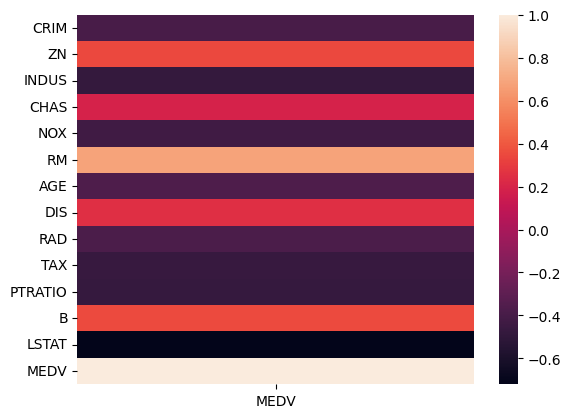

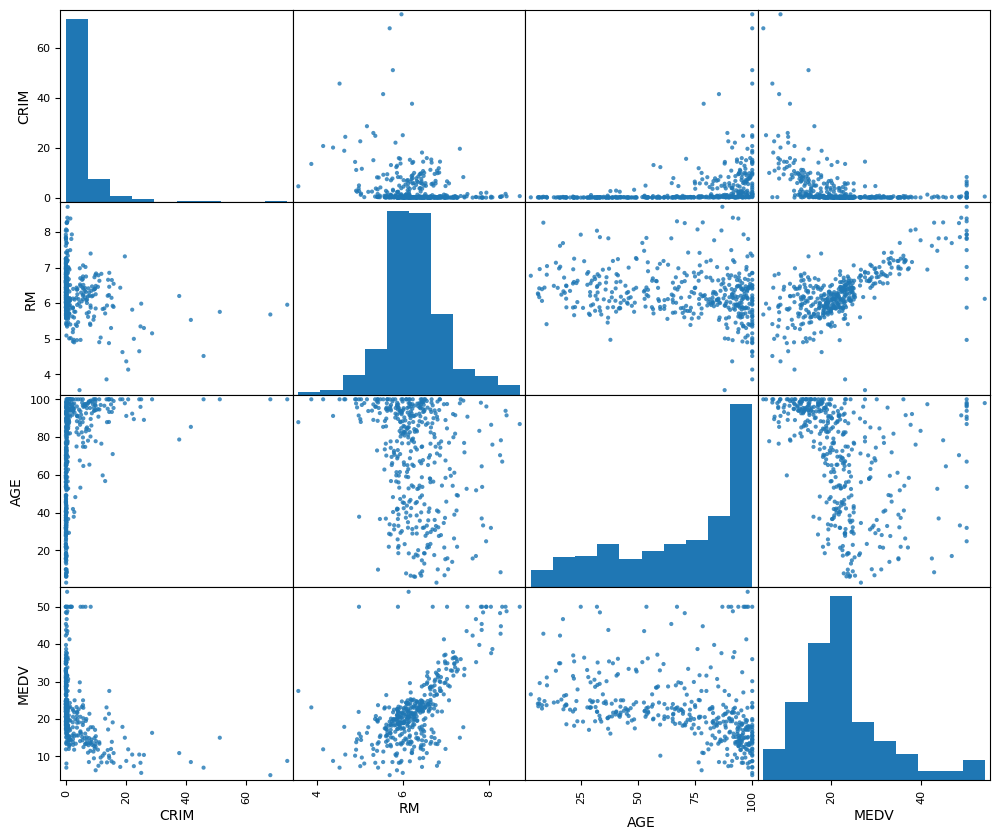

In [5]:
# Looking for Correlations
# We also created a fulldata_train by adding features and labels for future operations
fulldata_train=features.join(labels).copy(deep=True)
#finding and plottinf correlation matrix
corr_matrix=fulldata_train.corr()

#heatmap plotting using seaborn
import seaborn as sns
sns.heatmap(corr_matrix.loc[:,'MEDV':])

#scatter_matrix plotting using pandas.plotting
from pandas.plotting import scatter_matrix
#its better that you use attributes and see plots and then change items in it and again see plots
attributes=['CRIM','RM','AGE','MEDV']
scatter_matrix(fulldata_train[attributes],alpha=0.8,figsize=(12,10))
plt.show()

## Creating a Pipeline and applying Imputer (Removing Missing Attributes)

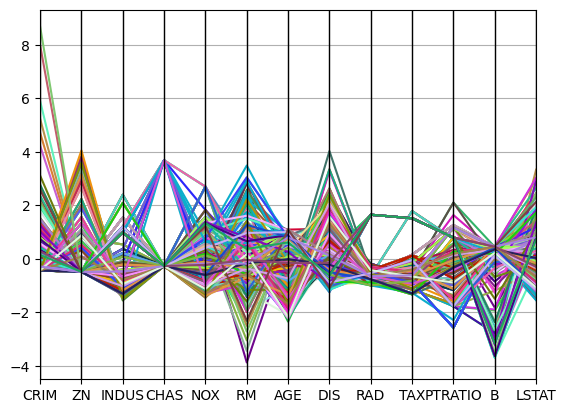

In [6]:
# We will crete a pipeline here and add Imputer and scaling into pipeline
my_pipeline=Pipeline([
('imputer',SimpleImputer(strategy="median")),#We can add as many process as we want
('std_scaler',StandardScaler())
])

# Parllel plotting of dataframe
fulldata_train=pd.DataFrame(my_pipeline.fit_transform(fulldata_train),columns=fulldata_train.columns)
ax=pd.plotting.parallel_coordinates(fulldata_train,'MEDV')
legend =ax.legend()
legend.remove()
plt.show()

# fit and transform the pipeline on features
#we are just giving a new name to the features as X_train and labels to Y_train
X_train=my_pipeline.fit_transform(features)
Y_train=labels.to_numpy()

# this below step is very important so that both of our training feature and testing features can pass through pipeline
# pass through pipeline
X_test=my_pipeline.fit_transform(X_test)

## Applying Regressor

In [7]:
# import your model and start modelling
# I have chosen Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor()
model.fit(X_train,Y_train)
# model.score(features,labels)
# model.coef_
# model.intercept_
Y_predict=model.predict(X_test)

## Testing the model on test data

In [8]:
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
print(final_predictions, list(Y_test))

[39.784 40.222 40.222 40.222 40.222 28.087 41.461 39.857 40.222 39.784
 40.914 40.222 40.222 41.186 41.152 41.322 27.649 40.222 39.403 40.222
 40.222 39.784 40.222 41.023 40.222 39.784 39.525 36.486 39.857 40.222
 41.322 36.048 40.222 40.222 40.222 40.222 40.222 40.222 41.624 40.222
 27.32  41.257 40.222 28.087 40.222 41.065 40.525 40.222 41.461 41.624
 40.222 41.695 40.642 40.222 41.186 40.222 40.222 39.403 26.882 40.222
 39.784 40.222 40.979 40.222 40.222 27.32  41.152 41.695 39.857 41.023
 39.476 39.784 41.461 41.023 40.222 39.514 40.222 37.308 40.222 41.891
 40.222 41.187 40.222 39.784 40.222 40.918 39.869 40.979 36.486 40.222
 39.555 41.461 40.222 39.674 41.324 40.457 36.486 40.222 36.486 40.222
 41.023 40.222 39.784] [22.4, 25.0, 22.2, 24.4, 31.5, 23.3, 25.0, 24.5, 22.0, 20.3, 12.3, 21.2, 28.0, 23.8, 14.6, 20.8, 17.2, 19.5, 14.4, 28.5, 30.1, 19.6, 23.6, 19.4, 24.7, 19.9, 13.5, 30.3, 21.8, 20.4, 27.9, 18.9, 46.0, 23.9, 21.7, 44.0, 33.2, 21.6, 27.0, 19.8, 20.9, 16.7, 22.2, 24.8, 28

## Calculating Accuracy of the Model (By calculating RMSE and MAPE)

In [9]:
from sklearn.metrics import mean_absolute_percentage_error
# calulating root mean squared error
rmse=np.sqrt(metrics.mean_squared_error(Y_test,Y_predict))
print("Rmse = ",rmse)

#Calculating K-fold cross validation (to check if our model got overfitted)
rmse_cross_val_scores=np.sqrt(-1*cross_val_score(model,X_train,Y_train,scoring="neg_mean_squared_error",cv=10))
print("Rmse cross val scores = \n",rmse_cross_val_scores)

mape=mean_absolute_percentage_error(Y_test, final_predictions)
mape = np.sqrt(mape)

mape
print("Accuracy of the Model is:", 100-mape, "%")

Rmse =  5.472954687342914
Rmse cross val scores = 
 [3.00904963 3.72168061 5.25955284 4.14676383 3.10405541 2.29835927
 6.81325694 2.9242558  3.45384864 3.63746626]
Accuracy of the Model is: 98.99997824993288 %
